In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3


In [2]:
db = sqlite3.connect('baseline_v2.1_10yrs.db')
df = pd.read_sql('select fieldRA,fieldDec,night from observations where note not like "%DD%";', db)

In [3]:
bins = np.arange(10)-0.5
x = (bins[1:] + bins[0:-1])/2

hash_list = [hash((v1, v2, v3)) for v1,v2,v3 in zip(df['fieldRA'], df['fieldDec'], df['night'])]


def binup_freq(pointings, bins):
    vals = np.sort(pointings)
    uvals = np.unique(vals)
    left = np.searchsorted(vals,uvals)
    right = np.searchsorted(vals,uvals, side='right')
    freq = right-left
    result, _bins = np.histogram(freq, bins)
    return result


vals = binup_freq(hash_list, bins)

Text(0.5, 0, 'Number of times pointed in single night')

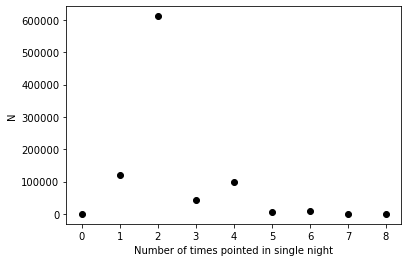

In [4]:
plt.plot(x, vals, 'ko')
plt.ylabel('N')
plt.xlabel('Number of times pointed in single night')

In [5]:
vals

array([     0, 121106, 611524,  44475,  98315,   7290,  10274,   1006,
         1021])